<a href="https://colab.research.google.com/github/gollum-98/Link-Prediction-Graph-Neural-Networks/blob/master/Twitch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#Importing the necessary packages
import csv
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import json

In [40]:
with open("/content/drive/My Drive/twitch/ENGB/musae_ENGB_features.json") as ft:
  #Loading the features dataset into ft_ds
  ft_ds = json.load(ft)
  #Sample feature vector
  print(ft_ds['7125'])

[1640, 3152, 865, 507, 48, 861, 920, 224, 2798, 606, 1195, 1895, 2936, 3054, 2384, 2362, 2656, 436, 1028, 1147, 2178]


In [41]:
#Reading the csv edge file
df = pd.read_csv("/content/drive/My Drive/twitch/ENGB/musae_ENGB_edges.csv")
df.head()

,from,to
0,6194,255
1,6194,980
2,6194,2992
3,6194,2507
4,6194,986


In [42]:
#saving the edges (training) data by removing the headers and indexes
df.to_csv('../content/train_woheader.csv',header=False,index=False)
#storing the list of edges in a variable 
g=nx.read_edgelist('../content/train_woheader.csv',delimiter=',',nodetype=int)
#printing the information of graph
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 7126
Number of edges: 35324
Average degree:   9.9141


Name: 
Type: Graph
Number of nodes: 13
Number of edges: 10
Average degree:   1.5385


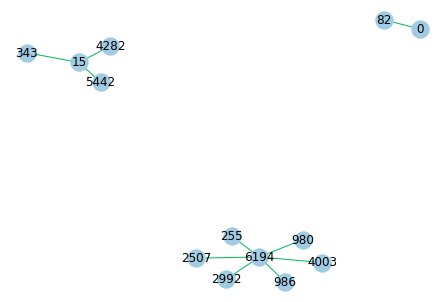

In [43]:
#creating a sample of 10 data points for visualization
pd.read_csv("/content/drive/My Drive/twitch/ENGB/musae_ENGB_edges.csv",nrows=10).to_csv('/content/train_woheader_sample.csv',header=False,index=False)
#reading the edgelist in a variable using networkX
subgraph=nx.read_edgelist('/content/train_woheader_sample.csv',delimiter=',',nodetype=int)
#plotting the graph
pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph_sample.pdf")
print(nx.info(subgraph))

In [44]:
%%time
###generating missing edges from given graph
### This is important as we have to create a balanced training data (not skewed)
import random
#getting all set of edges
r = csv.reader(open('/content/train_woheader.csv','r'))
#the dict will contain a tuple of 2 nodes as key and the value will be 1 if the nodes are connected else -1
edges = dict()
for edge in r:
	edges[(edge[0], edge[1])] = 1    ###Setting labels to be 1 as the value in the dictionary for the existent edges
    
missing_edges = set([])
while (len(missing_edges)<35324):
	a=random.randint(0, 7125)        ###  Selecting 2 nodes at random
	b=random.randint(0, 7125)
	tmp = edges.get((a,b),0)             ###  tmp=1 if the edge exists between a and b else tmp=0
	if tmp == 0 and a!=b:
		try:
            # adding points who are less likely to be linked,i.e, don't have a common node
			if nx.shortest_path_length(g,source=a,target=b) > 2: 

				missing_edges.add((a,b))
			else:
				continue  
		except:  
				missing_edges.add((a,b))              
	else:
		continue

CPU times: user 2.41 s, sys: 2.6 ms, total: 2.41 s
Wall time: 2.41 s


In [45]:
print(len(missing_edges)) ### Can be seen to be the same number as existent edges

35324


In [46]:
#print(missing_edges)  ###pairs of nodes without edges to be used in the training data

In [47]:
#print(edges)  ###Our dictionary of edges